In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Данные

Использованы данные об автомобилях содержащие различную информацию об их характеристиках.

Будет спрогнозирован тип коробки передач по остальным признакам.

In [ ]:
df = pd.read_csv('CarsData.csv')
df = df.drop(['model', 'Manufacturer'], axis = 1)

df = df.replace(['Petrol', 'Diesel', 'Hybrid', 'Other', 'Electric'], [1, 1, 0, 0, 0])
df['transmission'] = df['transmission'].astype('string')
df.dtypes


year                     int64
price                    int64
transmission    string[python]
mileage                  int64
fuelType                 int64
tax                      int64
mpg                    float64
engineSize             float64
dtype: object

In [ ]:
df.columns.values.tolist()

['year',
 'price',
 'transmission',
 'mileage',
 'fuelType',
 'tax',
 'mpg',
 'engineSize']

In [ ]:
df['transmission'].value_counts()

transmission
Manual       55502
Semi-Auto    22296
Automatic    19905
0                9
Name: count, dtype: Int64

In [ ]:
df = df[df['transmission'] != '0']
df['transmission'].value_counts()

transmission
Manual       55502
Semi-Auto    22296
Automatic    19905
Name: count, dtype: Int64

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('transmission', axis=1))

StandardScaler()

In [ ]:
scaled_features = scaler.transform(df.drop('transmission', axis = 1))

In [ ]:
df_feat = pd.DataFrame(scaled_features, columns = ['year',
 'price',
 'mileage',
 'fuelType',
 'tax',
 'mpg',
 'engineSize'])
df_feat.head()

,year,price,mileage,fuelType,tax,mpg,engineSize
0,-0.031376,-0.940180,-0.550302,0.187201,0.392327,0.302465,-1.190448
1,-0.031376,-0.586138,-0.665680,0.187201,0.392327,0.228307,-1.190448
2,0.912604,1.136546,-1.025867,0.187201,0.392327,-0.346413,0.599856
3,-0.031376,-0.433537,0.367497,0.187201,0.471245,0.469319,0.599856
4,-0.031376,-0.889110,-0.183610,0.187201,0.076657,-0.055963,-0.832387


In [ ]:
from sklearn.model_selection import train_test_split
X = df_feat
y = df['transmission']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Построение модели

In [ ]:
from sklearn.svm import SVC
svc = SVC(degree = 5, gamma = 'auto', max_iter = 2000).fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [ ]:
y_pred = svc.predict(X_test)
np.mean(y_pred != y_test)

0.5805329057350482

In [ ]:
y = y_test.tolist()
newy = []
for i in y:
  if i == 'Manual':
    newy.append(0)
  if i == 'Semi-Auto':
    newy.append(1)
  if i == 'Automatic':
    newy.append(2)
newy

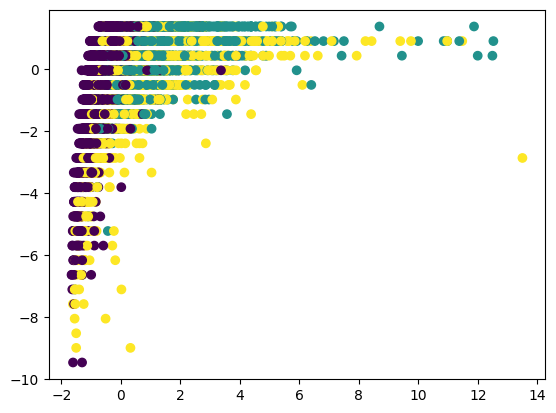

In [ ]:
plt.scatter(X_test['price'], X_test['year'], c = newy)

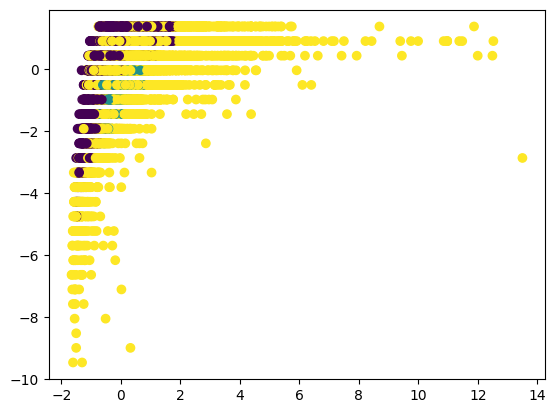

In [ ]:
y_pred = y_pred.tolist()
newy_pred = []
for i in y_pred:
  if i == 'Manual':
    newy_pred.append(0)
  if i == 'Semi-Auto':
    newy_pred.append(1)
  if i == 'Automatic':
    newy_pred.append(2)
newy_pred

plt.scatter(X_test['price'], X_test['year'], c = newy_pred)